# Name- Nishant Dubey
# Project 5- Retail Analysis with Walmart Data
# OBJECTIVE-
# One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately.

In [1]:
# Importing the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.float_format',
              lambda x: '%.3f' %x)

In [2]:
# Importing the data in Python Environment.
df = pd.read_csv('Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106


# Exploratory Data Analysis

In [3]:
df.shape

(6435, 8)

In [4]:
# Cheching for missing values.
df.isnull().sum()
#There are no missing values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
# Cheching for any duplicate entries.
df.duplicated().sum()

#There is not any duplicated entry

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# the column Date is object datatype
# We need to convert this to pandas datetime type.
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
# Lets ecplore each feature-


# Store

In [9]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [10]:
# The data in Store is categorical and level of measurement is nominal.
# We have data from 45 stores.
# This raises the doubt whether data is imbalanced.


In [11]:
# Lets chech how different number of records are for each store- 

In [12]:
print(list(df['Store'].value_counts()))

[143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143]


In [13]:
# All the store has same number of records.
#This means our data is balanced.

# Date

In [14]:
df['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [15]:
# We have data from 5th Feb 2010 to 26th Oct 2012
# Every record is for different day
# This can be used as primary key for our dataset

# Weekly Sales

In [16]:
df['Weekly_Sales'].describe()

count      6435.000
mean    1046964.878
std      564366.622
min      209986.250
25%      553350.105
50%      960746.040
75%     1420158.660
max     3818686.450
Name: Weekly_Sales, dtype: float64

In [17]:
# The data in Weekly Sales is continuous and level of measurement is ratio
# Median is less than mean indicating right skew

In [18]:
# lets see the distribution of weekly_Sales-

C:\Users\vasundhara dubey\AppData\Local\Temp\ipykernel_26532\1494747279.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Weekly_Sales', data=df, shade=True)


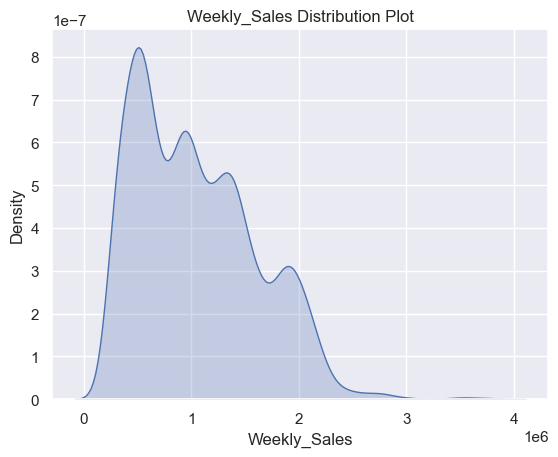

In [19]:
sns.kdeplot(x='Weekly_Sales', data=df, shade=True)
plt.title("Weekly_Sales Distribution Plot")
plt.show()

In [20]:
# The distribution is right-skewd.
# This means there are outliers.

In [21]:
# Lets confirm outliers-

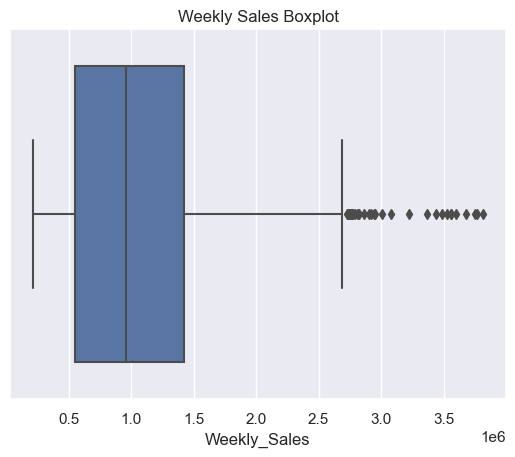

In [22]:
sns.boxplot(x='Weekly_Sales',data=df)
plt.title('Weekly Sales Boxplot')
plt.show ()

In [23]:
# There are huge numbers of outliers.
# This is expected fpr sales data.

# Holiday_Flag

In [24]:
df['Holiday_Flag'].unique()

array([0, 1], dtype=int64)

In [25]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [26]:
# This data is categorical and level of measurement is nominal.
# 0 indicates Non-Holiday Week and 1 is holiday Week.

# Temperature

In [27]:
df['Temperature'].describe()

count   6435.000
mean      60.664
std       18.445
min       -2.060
25%       47.460
50%       62.670
75%       74.940
max      100.140
Name: Temperature, dtype: float64

In [28]:
# the data ranges from -2.060 to 100.14
# This means temperature was recorded was Fahrenheit.
# The data is continuous and level of measurement is interval.
# Median is slighly greater than Mean indicating left skew.


In [29]:
# Lets see the distribution of Temperature-

C:\Users\vasundhara dubey\AppData\Local\Temp\ipykernel_26532\3221157701.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Temperature', data=df, shade=True)


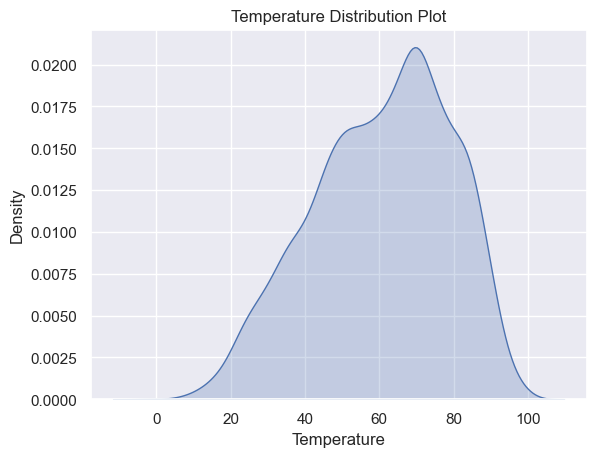

In [30]:
sns.kdeplot(x='Temperature', data=df, shade=True)
plt.title("Temperature Distribution Plot")
plt.show()

In [31]:
# The distribution is skewd which is ok considering this is on interval scale. 

In [32]:
# Fuel_Price

In [33]:
df['Fuel_Price'].describe()

count   6435.000
mean       3.359
std        0.459
min        2.472
25%        2.933
50%        3.445
75%        3.735
max        4.468
Name: Fuel_Price, dtype: float64

In [34]:
# The data in Fuel_Price is continuous and level of measurement is ratio.
# Mean is nearly equal to Median indicating normal distribution.


In [35]:
# lets see distribution of Fuel_Price-

C:\Users\vasundhara dubey\AppData\Local\Temp\ipykernel_26532\754121793.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Fuel_Price', data=df, shade=True)


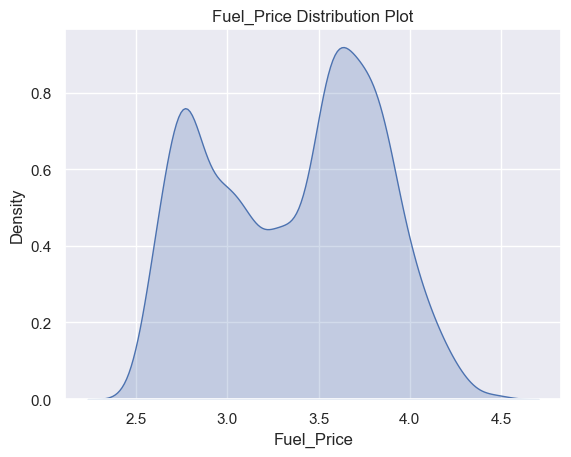

In [36]:
sns.kdeplot(x='Fuel_Price', data=df, shade=True)
plt.title("Fuel_Price Distribution Plot")
plt.show ()

In [37]:
# This seems interesting.
# We were wrong about conclusion from mean and median.
# This approximates a bimodal distribution.

# CPI 

In [38]:
df['CPI'].describe()

count   6435.000
mean     171.578
std       39.357
min      126.064
25%      131.735
50%      182.617
75%      212.743
max      227.233
Name: CPI, dtype: float64

In [39]:
# The data is continuous and level of measurement is continuous.
# Median is greater than Mean indicating left skew or more distribution on left side of mean.

In [40]:
#Let's see the distribution of CPI 

C:\Users\vasundhara dubey\AppData\Local\Temp\ipykernel_26532\2894083483.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='CPI', data=df, shade=True)


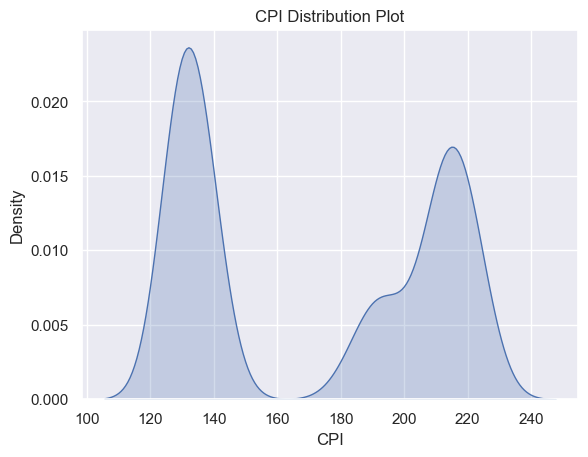

In [41]:
sns.kdeplot(x='CPI', data=df, shade=True)
plt.title("CPI Distribution Plot")
plt.show()

In [42]:
# The distribution seems to combined distribution of two plots.
# The distribution is multimod type.

# Unemployment

In [43]:
df['Unemployment'].describe()

count   6435.000
mean       7.999
std        1.876
min        3.879
25%        6.891
50%        7.874
75%        8.622
max       14.313
Name: Unemployment, dtype: float64

In [44]:
# The data in Unemployment is continuous and level of measurement is ratio.
# Since the data is less dispersed and mean is less than median, indicating right skew.

In [45]:
# Lets see the distribution of Unemployment

C:\Users\vasundhara dubey\AppData\Local\Temp\ipykernel_26532\1035289188.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Unemployment', data=df, shade=True)


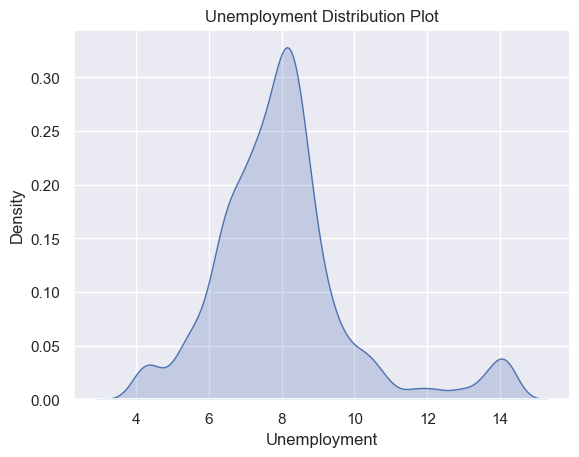

In [46]:
sns.kdeplot(x='Unemployment', data=df, shade=True)
plt.title("Unemployment Distribution Plot")
plt.show()

In [47]:
# The data is skewd and contains outliers.
# Outliers seems to be on both sides of mean.

In [48]:
# Lets confirm outliers-

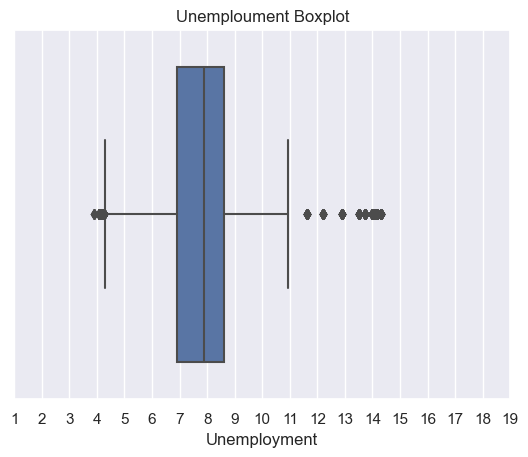

In [49]:
sns.boxplot(x='Unemployment', data=df)
plt.title("Unemploument Boxplot")
plt.xticks(list(range(1,20)))
plt.show()


In [50]:
#There are outliers on both sides of quartiles.

In [51]:
# Lets see the correlation matrix-

In [52]:
numerical_vars = df[['Weekly_Sales','CPI','Fuel_Price','Unemployment']]
numerical_vars.corr()


,Weekly_Sales,CPI,Fuel_Price,Unemployment
Weekly_Sales,1.000,-0.073,0.009,-0.106
CPI,-0.073,1.000,-0.171,-0.302
Fuel_Price,0.009,-0.171,1.000,-0.035
Unemployment,-0.106,-0.302,-0.035,1.000


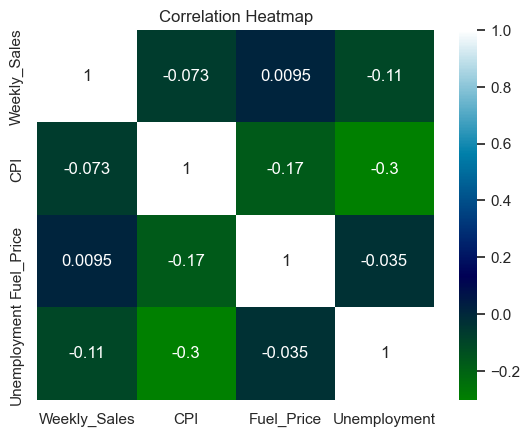

In [53]:
sns.heatmap(numerical_vars.corr(), annot=True, cmap='ocean')
plt.title('Correlation Heatmap')
plt.show()

In [54]:
#The correlation coefficient is not that significant to make any comments.

In [55]:
# Lets see the pairplot-

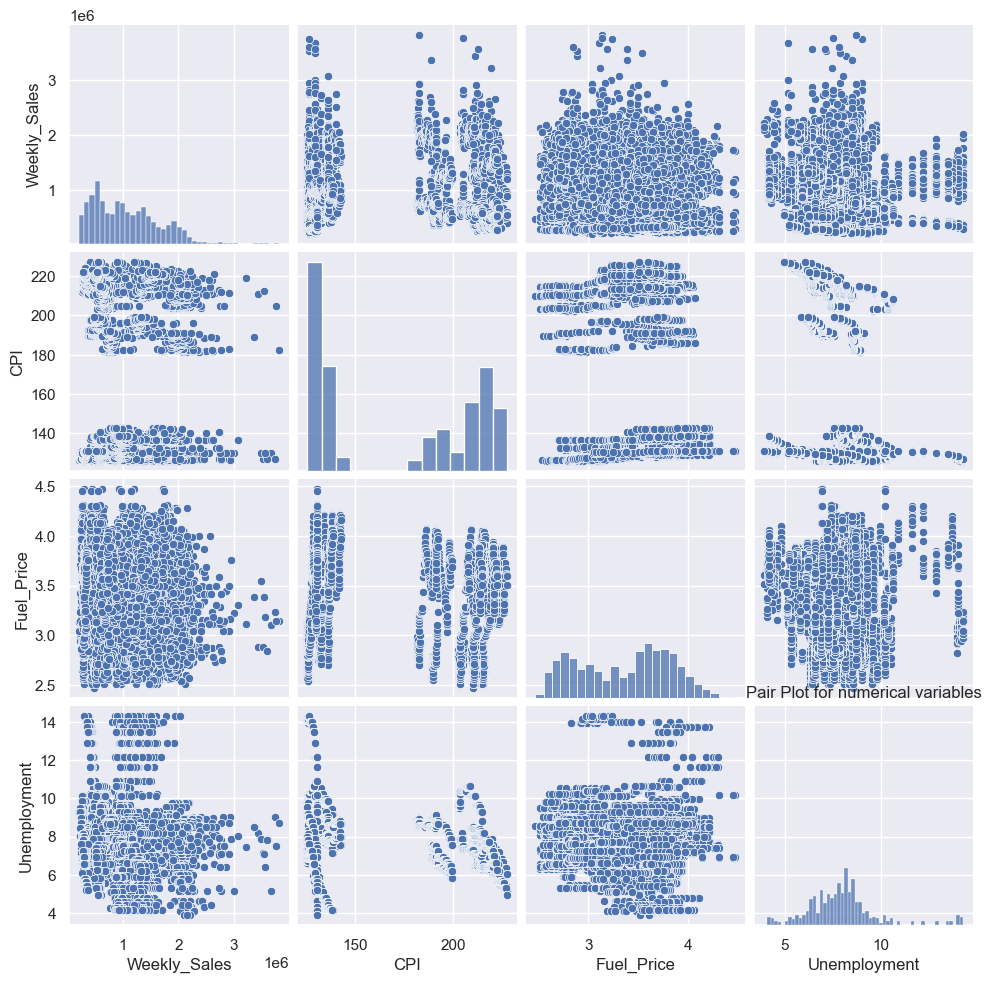

In [56]:
sns.pairplot(numerical_vars)
plt.title('Pair Plot for numerical variables')
plt.show()

In [57]:
# There seems to be no linear relationship with any pair of variables.

# Analysis Tasks

# 1. Which store has maximum sales?

In [58]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum()
store_sales = pd.DataFrame(store_sales).\
             rename(columns={'Weekly_Sales':'Total Sales'})
store_sales.head()

,Total Sales
Store,
1,222402808.850
2,275382440.980
3,57586735.070
4,299543953.380
5,45475688.900


In [59]:
store_sales.sort_values(by='Total Sales',ascending=False).index[0]

20

In [60]:
#Store 20 has the maximum sales.

# 2. Which store has maximum standard deviation i.e., the sales vary a lot?

# Also, find out the coefficient of mean to standard deviation

In [61]:
store_sales['std'] = df.groupby('Store')['Weekly_Sales'].std()
store_sales.head()

,Total Sales,std
Store,,
1,222402808.850,155980.768
2,275382440.980,237683.695
3,57586735.070,46319.632
4,299543953.380,266201.442
5,45475688.900,37737.966


In [62]:
store_sales.sort_values(by='std',ascending=False).index[0]

14

In [63]:
# Store 14 has the maximum standard deviation.

In [64]:
store_sales['Mean'] = df.groupby('Store')['Weekly_Sales'].mean()
store_sales['CV'] = store_sales['std']/ store_sales['Mean']
store_sales.head()

,Total Sales,std,Mean,CV
Store,,,,
1,222402808.850,155980.768,1555264.398,0.100
2,275382440.980,237683.695,1925751.336,0.123
3,57586735.070,46319.632,402704.441,0.115
4,299543953.380,266201.442,2094712.961,0.127
5,45475688.900,37737.966,318011.810,0.119


In [65]:
# Using indexing to locate store.
store_sales.iloc[13]

Total Sales   288999911.340
std              317569.949
Mean            2020978.401
CV                    0.157
Name: 14, dtype: float64

In [66]:
# The coefficient of variation for Store 14 is 0.157

# 3. Which store/s has good quarterly growth rate in Q3'2012?

In [67]:
# Extracting quarter and year from date.
df_interest = df.loc[:, ('Date','Store','Weekly_Sales')]
df_interest['Year'] = df_interest['Date'].dt.year
df_interest['Quarter'] = df_interest['Date'].dt.quarter
df_interest.head()

,Date,Store,Weekly_Sales,Year,Quarter
0,2010-02-05,1,1643690.900,2010,1
1,2010-02-12,1,1641957.440,2010,1
2,2010-02-19,1,1611968.170,2010,1
3,2010-02-26,1,1409727.590,2010,1
4,2010-03-05,1,1554806.680,2010,1


In [68]:
# Creating a subset of df.
df_2012 = df_interest.query('Year==2012')
df_2012.head()

,Date,Store,Weekly_Sales,Year,Quarter
100,2012-01-06,1,1550369.920,2012,1
101,2012-01-13,1,1459601.170,2012,1
102,2012-01-20,1,1394393.840,2012,1
103,2012-01-27,1,1319325.590,2012,1
104,2012-02-03,1,1636339.650,2012,1


In [69]:
df_2012_quarter_sales = df_2012.groupby(['Store','Quarter'])['Weekly_Sales'].sum().unstack()
df_2012_quarter_sales.drop([1,4], axis=1, inplace=True) # Dropping data for quarter 1 &4.
df_2012_quarter_sales.head()

Quarter,2,3
Store,,
1,20978760.120,20253947.780
2,25083604.880,24303354.860
3,5620316.490,5298005.470
4,28454363.670,27796792.460
5,4466363.690,4163790.990


In [70]:
# Let's see how sales in Q3 were different from Q2 -

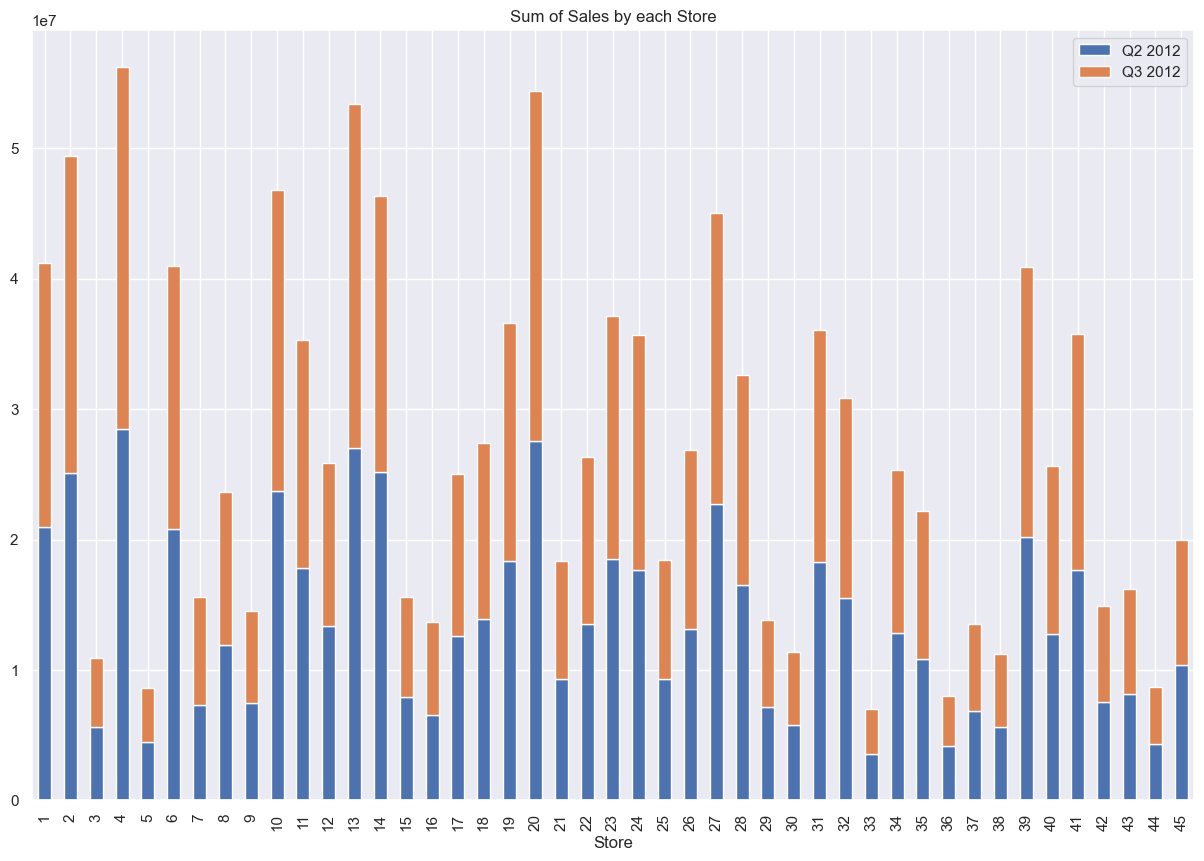

In [71]:
df_2012_quarter_sales.sort_index().plot(kind='bar', figsize=(15,10), stacked= True)
plt.legend(['Q2 2012','Q3 2012'])
plt.title('Sum of Sales by each Store')
plt.show()

In [72]:
# Calculating growth rate.
growth = (df_2012_quarter_sales[3] - df_2012_quarter_sales[2])
growth_rate = growth / df_2012_quarter_sales[2]
df_2012_quarter_sales['Growth rate'] = growth_rate*100
df_2012_quarter_sales.head()

Quarter,2,3,Growth rate
Store,,,
1,20978760.120,20253947.780,-3.455
2,25083604.880,24303354.860,-3.111
3,5620316.490,5298005.470,-5.735
4,28454363.670,27796792.460,-2.311
5,4466363.690,4163790.990,-6.774


In [73]:
df_2012_quarter_sale = df_2012_quarter_sales\
                       .sort_values(by='Growth rate',ascending = False)
df_2012_quarter_sales.head(10)

Quarter,2,3,Growth rate
Store,,,
1,20978760.120,20253947.780,-3.455
2,25083604.880,24303354.860,-3.111
3,5620316.490,5298005.470,-5.735
4,28454363.670,27796792.460,-2.311
5,4466363.690,4163790.990,-6.774
6,20833909.920,20167312.240,-3.200
7,7290859.270,8262787.390,13.331
8,11919630.950,11748952.700,-1.432
9,7484935.110,7022149.560,-6.183


In [74]:
# Store 7 has the highest growth rate with 13.33%.
# Store 16 is on 2nd position with 8.488 %.

# Lets  visualize the growth rate for the top 10 stores-

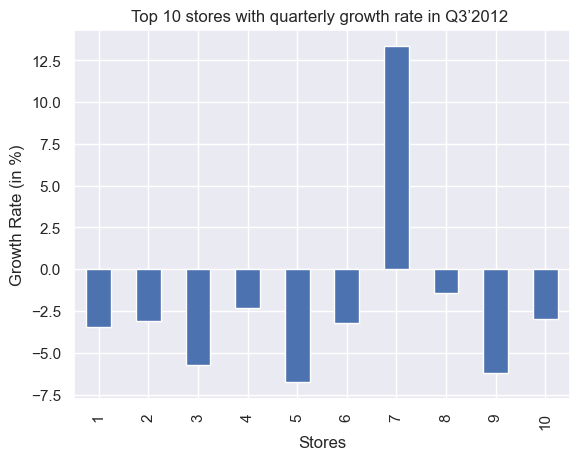

In [75]:
df_2012_quarter_sales['Growth rate'][:10].plot(kind='bar')
plt.title('Top 10 stores with quarterly growth rate in Q3’2012 ')
plt.ylabel('Growth Rate (in %)')
plt.xlabel('Stores')
plt.show()

# 4. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

# Holiday Events

# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [76]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0   1041256.380
1   1122887.892
Name: Weekly_Sales, dtype: float64

In [77]:
mean_sales_non_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()[0]
mean_sales_non_holiday

1041256.3802088555

In [78]:
# Creating a dictionary with holiday names as keys and dates as values.
holiday_dates = {
                'super_bowl' : ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-13'],
                'labour_day' : ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'],
                'thanks_giving' : ['2010-11-26','2011-11-25','2012-11-12', '2013-11-13'],
                'christmas' : ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']
                 }
holiday_dates         

{'super_bowl': ['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-13'],
 'labour_day': ['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'],
 'thanks_giving': ['2010-11-26', '2011-11-25', '2012-11-12', '2013-11-13'],
 'christmas': ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']}

In [79]:
# reating a dictionary containing holiday name as key and mean sales as values.
holiday_sales = {}
# Running a loop to populate holiday_sales.
for key,values in holiday_dates.items():
    mean_sales = df[df.Date.isin(values)]['Weekly_Sales'].mean()
    holiday_sales[key] = round(mean_sales,2)
holiday_sales

{'super_bowl': 1079127.99,
 'labour_day': 1042427.29,
 'thanks_giving': 1471273.43,
 'christmas': 960833.11}

In [80]:
# Compairing with mean_sale_non_holiday.
outperforming_holidays = []
for key, value in holiday_sales.items():
    if value > mean_sales_non_holiday :
        outperforming_holidays.append(key)
print(outperforming_holidays)

['super_bowl', 'labour_day', 'thanks_giving']


In [81]:
# 3 out of 4 holidays have their mean sales greater than mean non holiday season.
# Sales during Thanks Giving has highest mean sales.
# Only christmas has underperformed.

In [82]:
# however this raises the doubt whether christmas really recorded less sales. Lets visualize it to confirm-

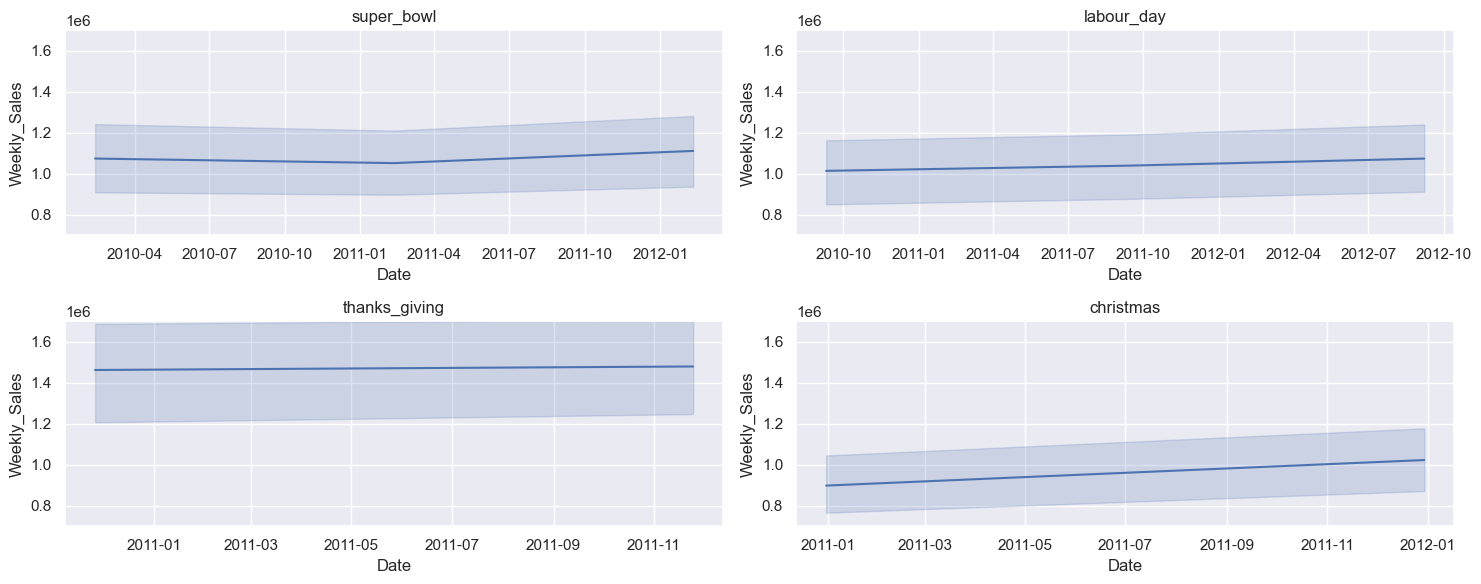

In [83]:
plt.figure(figsize=(15,6))

i= 1
for key,val in holiday_dates.items():
    key_df = df[df.Date.isin(val)]
    plt.subplot(2,2,i)
    sns.lineplot(x='Date',y ='Weekly_Sales', data= key_df)
    plt.ylim(0.7e6,1.7e6) # Keeping the y-axis on same scale.
    plt.title(key)
    i +=1
plt.tight_layout()

In [84]:
# From above , it is clear that though sales during christmas were increased year-wise but it was low as compared to other holidays..

# 5. Provide a monthly and semester view of sales in units and giuve insights.

In [85]:
# Using the df_interest created earlier.
df_interest.head()

,Date,Store,Weekly_Sales,Year,Quarter
0,2010-02-05,1,1643690.900,2010,1
1,2010-02-12,1,1641957.440,2010,1
2,2010-02-19,1,1611968.170,2010,1
3,2010-02-26,1,1409727.590,2010,1
4,2010-03-05,1,1554806.680,2010,1


In [86]:
df_interest['Month'] = df_interest['Date'].dt.month
df_interest.head()

,Date,Store,Weekly_Sales,Year,Quarter,Month
0,2010-02-05,1,1643690.900,2010,1,2
1,2010-02-12,1,1641957.440,2010,1,2
2,2010-02-19,1,1611968.170,2010,1,2
3,2010-02-26,1,1409727.590,2010,1,2
4,2010-03-05,1,1554806.680,2010,1,3


C:\Users\vasundhara dubey\AppData\Local\Temp\ipykernel_26532\1216580465.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Weekly_Sales',


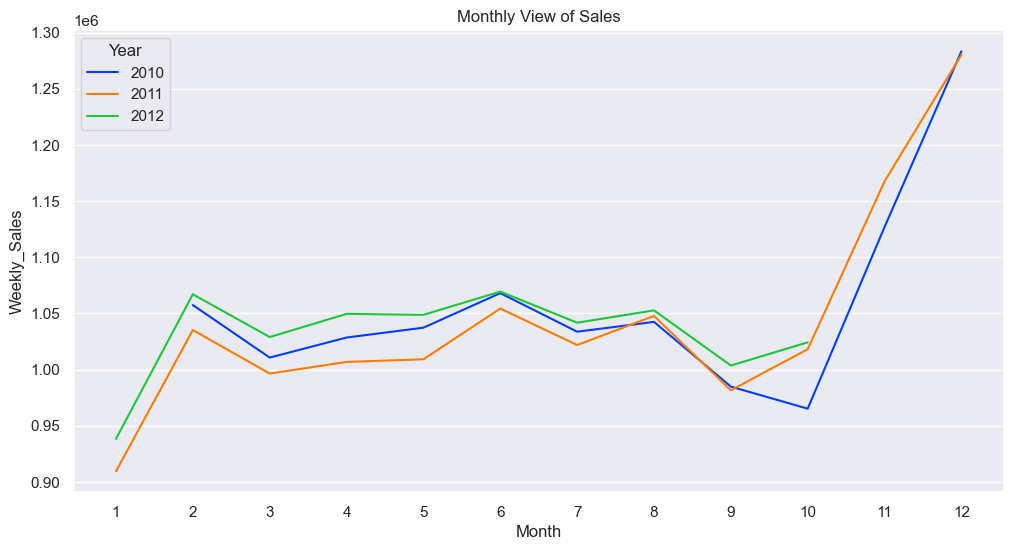

In [87]:
# Monthly view of sales.
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Weekly_Sales',
            hue='Year', ci=None,
             palette='bright',data=df_interest)
plt.xticks(range(1,13))
plt.grid(axis='x')
plt.title('Monthly View of Sales')
#plt.legend('Monthly View of Sales')
plt.show()

        

In [88]:
# As we have data from Feb'10 to Oct'12, hence line for year 2011 is starting from 2nd month and for year 2012 line is ending at 10.
# January, November and December shows remarkable increase in Sales.

In [89]:
df_interest['Semester'] = ['S1' if month <= 6 else 'S2' for month in df_interest['Month']]
df_interest.head()

,Date,Store,Weekly_Sales,Year,Quarter,Month,Semester
0,2010-02-05,1,1643690.900,2010,1,2,S1
1,2010-02-12,1,1641957.440,2010,1,2,S1
2,2010-02-19,1,1611968.170,2010,1,2,S1
3,2010-02-26,1,1409727.590,2010,1,2,S1
4,2010-03-05,1,1554806.680,2010,1,3,S1


In [90]:
year_sales = df_interest.groupby('Year')

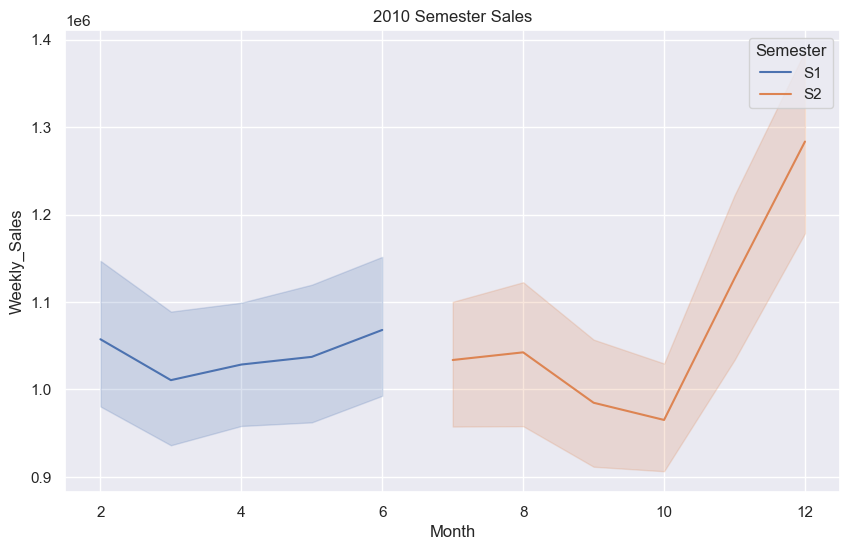

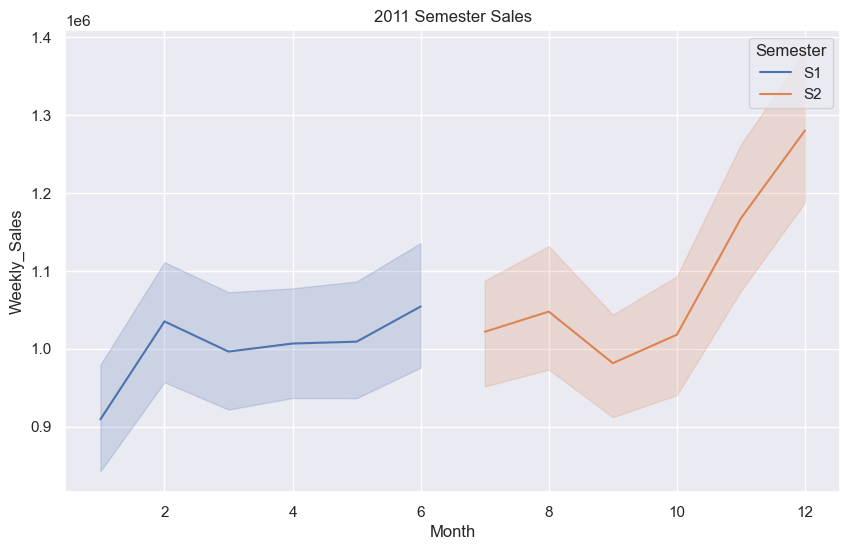

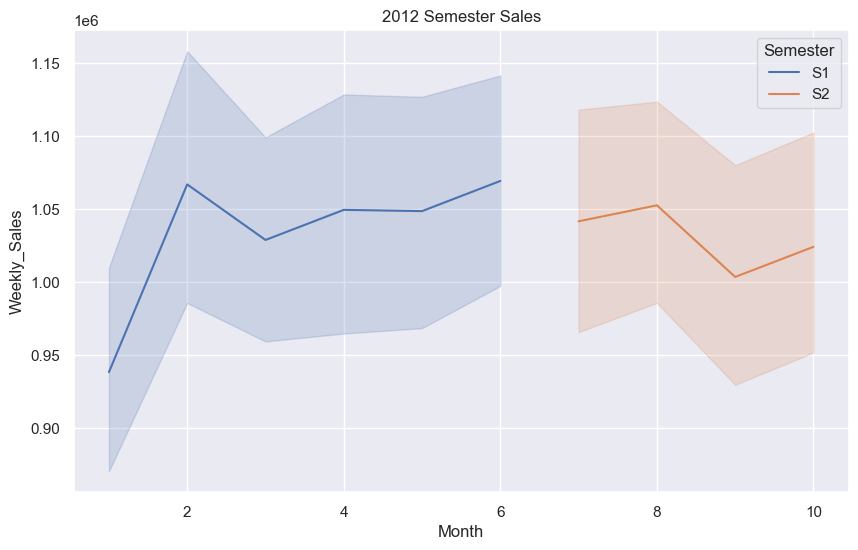

In [91]:
# Plotting year-wise semester view of sales.
for year in year_sales.groups.keys():
    current_year_df = year_sales.get_group(year)
    plt.figure(figsize=(10,6))
    sns.lineplot(x='Month', y='Weekly_Sales',
                hue = 'Semester', data=current_year_df)
    plt.title(f'{year} Semester Sales')

# Statistical Model

# For store 1-Build prediction model to forecast demand 

# Linear Regression - Utilize varibles like date and restructure dates as 1 for 5 Feb 2010 (Starting from the earliest date in order). Hypothesize if CPI, unemployment and fuel price have any impact on sales.

# Change dates into days by creating new variables

In [92]:
# Importing the required libraries for model building.
import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
!pip install xgboost
from xgboost import XGBRegressor



In [93]:
store1_df = df.query('Store==1')
store1_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.900,0,42.310,2.572,211.096,8.106
1,1,2010-02-12,1641957.440,1,38.510,2.548,211.242,8.106
2,1,2010-02-19,1611968.170,0,39.930,2.514,211.289,8.106
3,1,2010-02-26,1409727.590,0,46.630,2.561,211.320,8.106
4,1,2010-03-05,1554806.680,0,46.500,2.625,211.350,8.106


In [94]:
store1_df.shape

(143, 8)

In [95]:
# We have just 143 records for building our model.
# This is very very less for any model to train.
# This is for sure we are not going to have a model with an acceptable accuracy

In [96]:
# Anyway lets do as per question asked-

#Lets first do hypothesis test-

# H(Null Hypothesis) : CPI, unemployment, and fuel price have no impact on sales.
 #(Alternate Hypothesis) : CPI, unemployment, and fuel price have impact on sales.
#Required test : t-test using Ordinary Least Square method
#Significance level : 0.05


In [97]:
results = sm.ols('Weekly_Sales ~ CPI + Unemployment + Fuel_Price',
                data=store1_df).fit()

In [98]:
results.pvalues < 0.05

Intercept        True
CPI              True
Unemployment     True
Fuel_Price      False
dtype: bool

# Conclusion

In [99]:
# CPI and uneployment have impact on sales.
# Fuel_Price have no impact on sales.

# Model Building

In [100]:
store1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 10.1 KB


In [101]:
# We can restructure Date into days to better train the model.
# Store is same for every record so we need to drop it as it will add no value.
# We can convert Temperature into kelvin for higher scale of measurement.
# We have to create dummy variable for nominal variable Holiday_Flag.

In [102]:
# Then we can drop Date, Holiday_Flag, Temperate and Store from our datset.

In [103]:
# Modifications.
store1_df = store1_df.sort_values(by='Date')
store1_df['Days'] = np.arange(1,len(store1_df)+1)
store1_df['Temp_Kelvin'] = store1_df['Temperature'].map(lambda x: ((x-32)*5/9) +273.15)
dummies = pd.get_dummies(store1_df['Holiday_Flag'],prefix='h_flag')

# Dropping Date,Store,Holiday_Flag and Temperature columns.
store1_df = store1_df.drop(['Date','Store','Temperature','Holiday_Flag'],axis=1)

# Concatenating dummies with our datset.
store1_df_modified = pd.concat([store1_df,dummies],axis=1)
store1_df_modified.head()


,Weekly_Sales,Fuel_Price,CPI,Unemployment,Days,Temp_Kelvin,h_flag_0,h_flag_1
0,1643690.900,2.572,211.096,8.106,1,278.878,1,0
1,1641957.440,2.548,211.242,8.106,2,276.767,0,1
2,1611968.170,2.514,211.289,8.106,3,277.556,1,0
3,1409727.590,2.561,211.320,8.106,4,281.278,1,0
4,1554806.680,2.625,211.350,8.106,5,281.206,1,0


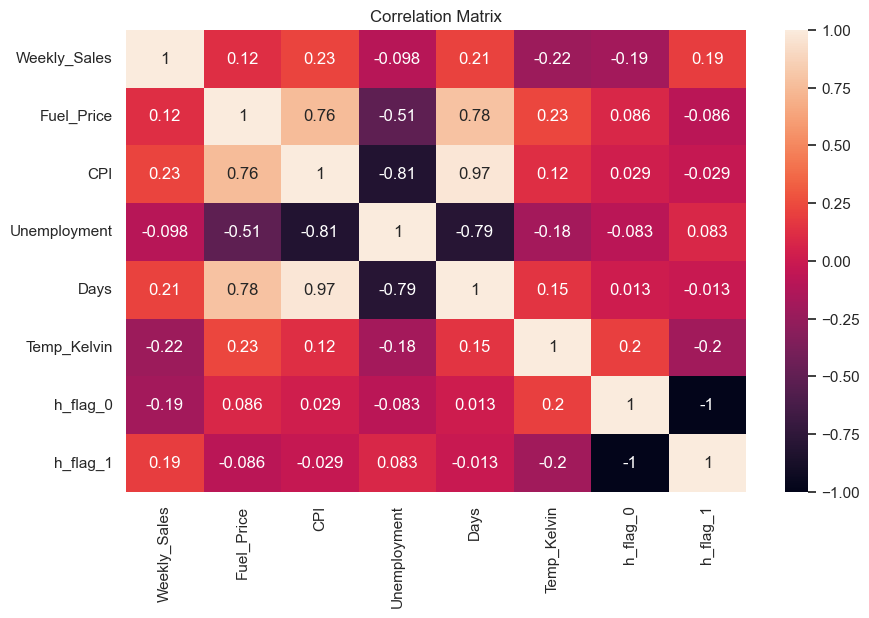

In [104]:
plt.figure(figsize=(10,6))
sns.heatmap(store1_df_modified.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [105]:
# There seems to be no string relationship.
# Linear model will fail in this dataset.
# Lets use non-linear models.
# We will select model based on Root Mean Squared Erroe.


In [106]:
# Splitting the target and predictors
Y = store1_df_modified['Weekly_Sales'].values
X = store1_df_modified.drop('Weekly_Sales', axis=1).values
Y.shape, X.shape

((143,), (143, 7))

In [107]:
# Since we have different kind of variables, lets standardlize the values of independent vaiables 

In [108]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [109]:
X = scaler.transform(X)
X.max(), X.min()

(3.6469165057620945, -3.6469165057620945)

In [110]:
# Lets split the datasets-
# The sample sizes are very small ,we will use 85% of our dataset for training.


In [111]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.80)
print(f'The shape of X_train is {X_train.shape} and Y_train is {Y_train.shape}')
print(f'The shape pf X_test is {X_test.shape} and Y_test is {Y_test.shape}')

The shape of X_train is (114, 7) and Y_train is (114,)
The shape pf X_test is (29, 7) and Y_test is (29,)


# Decision Tree Regressor

In [112]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [113]:
y_pred_dt = dt_model.predict(X_test)
print('RMSE for Decision Tree Regressor is ' ,np.sqrt(mean_absolute_error(Y_test, y_pred_dt)))


RMSE for Decision Tree Regressor is  344.3920520529493


# Random Forest Regressor

In [114]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

In [115]:
y_pred_rf = rf_model.predict(X_test)
print('RMSE for Random Forest Regressor is' , np.sqrt(mean_absolute_error(Y_test, y_pred_rf)))

RMSE for Random Forest Regressor is 365.4482979753819


# Support Vector Regressor

In [116]:
sv_model = SVR()
sv_model.fit(X_train, Y_train)

SVR()

In [117]:
y_pred_sv = rf_model.predict(X_test)
print('RMSE for Support Vector Regressor is ' ,np.sqrt(mean_absolute_error(Y_test, y_pred_sv)))


RMSE for Support Vector Regressor is  365.4482979753819


#  XGB Regressor

In [118]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [119]:
y_pred_xgb = xgb_model.predict(X_test)
print('RMSE for XGB Regressor is ' ,np.sqrt(mean_absolute_error(Y_test, y_pred_xgb)))


RMSE for XGB Regressor is  393.2197190042649


In [120]:
# From all the models above, Random Forest and Support Vector Regressor has lowest RMSE.

In [121]:
final_model = RandomForestRegressor()
final_model.fit(X_train, Y_train)

RandomForestRegressor()

In [122]:
y_pred = final_model.predict(X_test)

In [123]:
rmse = np.sqrt(mean_absolute_error(Y_test,y_pred))
print('RMSE of model is ',round(rmse,2))

RMSE of model is  356.42


# Test for Normality

In [124]:
residuals = Y_test- y_pred

C:\Users\vasundhara dubey\AppData\Local\Temp\ipykernel_26532\2429215045.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


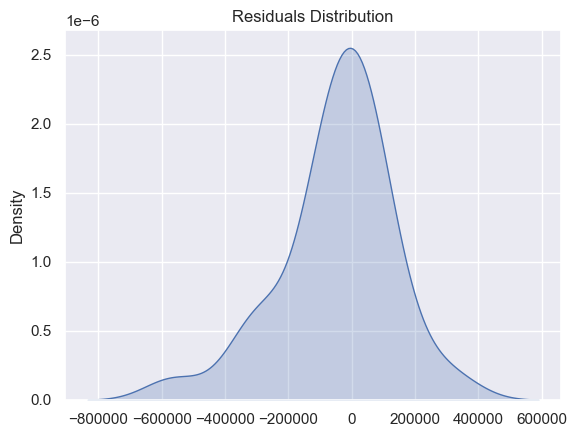

In [125]:
sns.kdeplot(residuals, shade=True)
plt.title('Residuals Distribution')
plt.show()

# We have some extreme values.
# This could be because of some ouliers.
# As the dataset was very small, we can't remove outliers.
# Also , We have sales data from holidays reason which are outliers.
# We need our model to capture those values too, they are also crucial.


# Conclusion: I don't  have enough data to make a good model.